In [12]:
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import ClusterCentroids
%matplotlib inline

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
X_train = joblib.load('tmp/X_train.pkl')
X_test = joblib.load('tmp/X_test.pkl')

y_train = joblib.load('tmp/y_train.pkl')
y_test = joblib.load('tmp/y_test.pkl')


In [15]:
print(len(y_test))

331162


In [16]:
clf = RandomForestClassifier(n_jobs=1, random_state=0, n_estimators=20, max_features="sqrt", min_samples_split=50, criterion="entropy")
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Confusion matrix, without normalization
[[ 45848   2981  45320]
 [ 14496  17628  31897]
 [ 23827   2605 146560]]
Normalized confusion matrix
[[0.49 0.03 0.48]
 [0.23 0.28 0.5 ]
 [0.14 0.02 0.85]]


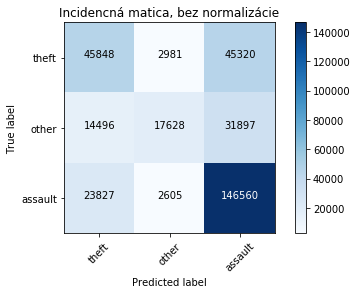

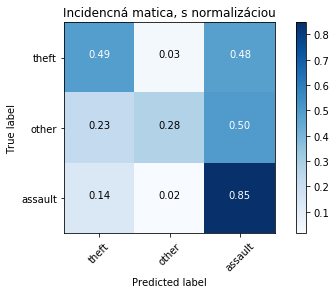

In [17]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
y_pred = clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(y_test),
                      title='Incidencná matica, bez normalizácie')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(y_test), normalize=True,
                      title='Incidencná matica, s normalizáciou')

plt.show()

In [18]:
#Accurancy
scores = clf.score(X_test,y_test);
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.00)


In [8]:
# :500000 Accurancy 0.22 criterion entropy
# :200000 Accurancy 0.58 criterion gini s prekatogirizaciou
# :500000 Accurancy 0.59 criterion gini s prekatogirizaciou
##############
# min_samples_split = 50, crterion = entropy, accurancy = 0.63


In [19]:
#test with undersampling data

X_train = joblib.load('tmp/X_ru_train.pkl')
X_test = joblib.load('tmp/X_ru_test.pkl')

y_train = joblib.load('tmp/y_ru_train.pkl')
y_test = joblib.load('tmp/y_ru_test.pkl')

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

192167
Confusion matrix, without normalization
[[39156  9239 15518]
 [18541 27957 17941]
 [15886  8543 39386]]
Normalized confusion matrix
[[0.61 0.14 0.24]
 [0.29 0.43 0.28]
 [0.25 0.13 0.62]]


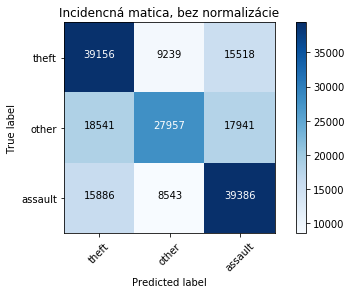

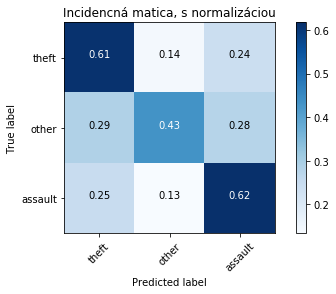

In [20]:
y_pred = clf.predict(X_test)
print(len(y_test))
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(y_test),
                      title='Incidencná matica, bez normalizácie')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(y_test), normalize=True,
                      title='Incidencná matica, s normalizáciou')

plt.show()

In [21]:
#Accurancy
scores = clf.score(X_test,y_test);
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.55 (+/- 0.00)


In [ ]:
y_pred[0]

In [ ]:
# min_samples_split = 50, crterion = entropy, accurancy = 0.55